# I punteggi fattoriali {#sec-fa-model-1}

**Prerequisiti**

- Leggere il capitolo 6, *Factor Analysis and Principal Component Analysis*, del testo *Principles of psychological assessment* di @petersen2024principles. 

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [2]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(lavaan, semPlot, corrplot, tidyr, kableExtra)

Uno dei momenti più difficili nel processo di sviluppo di un test
psicometrico è quello dell'interpretazione dei fattori. La verifica del
livello di affidabilità rivela il grado di precisione delle misure
ottenute ma non fornisce alcuna informazione sulla natura di ciò che si
sta misurando. Non esistono specifiche indicazioni che guidino il lavoro
interpretativo. Dipende, perciò, dalla capacità e dall'esperienza del
ricercatore cogliere il significato comune delle variabili confluite in
un fattore, attenendosi alla realtà delle singole variabili senza
fornire interpretazioni fantasiose. È importante rendersi conto che sia
la scelta del metodo di estrazione dei fattori, sia il problema del
numero dei fattori da estrarre, sia la scelta del metodo con cui
effettuare la rotazione, rendono molto arbitraria l'interpretazione
della soluzione fattoriale.

I passaggi teorici necessari per interpretare una matrice fattoriale
ruotata possono essere descritti nel modo seguente.

1.  Si definisce un livello arbitrario per le saturazioni che ci indichi
    il limite oltre il quale non riteniamo le variabili sufficientemente
    importanti per caratterizzare quel determinato fattore. Solitamente
    si sceglie la soglia di .40. In casi particolari è possibile usare
    valori maggiori o minori di questo, a seconda che si abbia un numero
    ristretto o troppo ampio di variabili da interpretare.

2.  Si ordinano le saturazioni delle variabili del fattore in ordine
    decrescente (in valore assoluto), fermandosi al livello prescelto.

3.  Si scrive accanto ad ogni saturazione la denominazione della
    variabile corrispondente (o il testo dell'item).

4.  Tenendo presente il dominio di indagine, le teorie di riferimento ed
    eventuali risultati precedenti, si cerca di stabilire quale sia il
    tratto, caratteristica o aspetto che queste variabili abbiano in
    comune, in modo da poter in modo da poter "nominare" il fattore che
    definisce questo tratto comune. In questo processo interpretativo
    gli item con le saturazioni maggiori contribuiscono in misura
    maggiore alla definizione del carattere comune del fattore e,
    viceversa, ciò che è stato individuato come tratto comune delle
    variabili deve comparire in maggior grado nelle variabili più
    sature.

5.  Il segno negativo di una saturazione indica solamente un'opposizione
    rispetto alle saturazioni positive. Il tratto comune alle variabili
    dovrebbe essere pensato come un continuum che passa dalla sua
    massima presenza al suo opposto. Per procedere all'interpretazione
    conviene iniziare dalle variabili il cui segno è più frequente e
    considerarle come se fossero positive; di conseguenza, le altre
    (siano esse di segno positivo o negativo) devono essere considerate
    di segno opposto.

6.  Nel caso in cui non si riesca a riscontrare nessun tratto comune
    alle variabili del fattore, si dovrà concludere che il fattore non è
    interpretabile e che le variabili sono state tra loro associate per
    un errore attribuibile o al campione o alla misurazione delle
    variabili stesse. Normalmente i "primi" fattori estratti sono
    facilmente interpretabili mentre gli "ultimi", soprattutto se ne
    sono stati estratti molti o se la matrice delle correlazioni
    iniziale fra le variabili contiene molti valori bassi, sono spesso
    difficilmente interpretabili o saturi di una sola variabile e quindi
    fattori specifici di quella variabile. In linea di massima se i
    fattori non interpretabili sono molti è meglio non considerare
    affatto i risultati dell'analisi fattoriale.

### Esempio di interpretazione

Il WISC-III (Wechsler Intelligence Scale For Children - III) valuta
l'abilità intellettiva di soggetti dai 6 ai 16 anni e 11 mesi. I subtest
sono stati selezionati per valutare diverse abilità mentali, che tutte
insieme indicano l'abilità intellettiva generale del bambino. Alcuni gli
richiedono un ragionamento astratto, altri si focalizzano sulla memoria,
altri ancora richiedono certe abilità percettive e così via.

Si consideri la matrice di correlazione tra i subtest della scala
WISC-III riportata dal manuale.

In [3]:
lower <- '
1
.66      1
.57	.55      1
.70	.69	.54       1
.56	.59	.47	.64      1
.34	.34	.43	.35	.29      1
.47	.45	.39	.45	.38	.25      1
.21	.20	.27	.26	.25	.23	.18      1
.40	.39	.35	.40	.35	.20	.37	.28      1
.48	.49	.52	.46	.40	.32	.52	.27	.41      1
.41	.42	.39	.41	.34	.26	.49	.24	.37	.61      1
.35	.35	.41	.35	.34	.28	.33	.53	.36	.45	.38      1
.18	.18	.22	.17	.17	.14	.24	.15	.23	.31	.29	.24     1
'

In [4]:
wisc_III_cov <- getCov(
  lower,
  names = c(
    "INFO", "SIM", "ARITH", "VOC", "COMP", "DIGIT", "PICTCOM",
    "CODING", "PICTARG", "BLOCK", "OBJECT", "SYMBOL", "MAZES"
  )
)

Eseguiamo l'analisi fattoriale con il metodo delle componenti principali
e una rotazione Varimax:

In [5]:
f_pc <- psych::principal(wisc_III_cov, nfactors = 3, rotate = "varimax")
print(f_pc)

Principal Components Analysis
Call: psych::principal(r = wisc_III_cov, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          RC1  RC3  RC2   h2   u2 com
INFO     0.80 0.25 0.09 0.72 0.28 1.2
SIM      0.81 0.25 0.08 0.72 0.28 1.2
ARITH    0.65 0.26 0.28 0.57 0.43 1.7
VOC      0.83 0.19 0.13 0.75 0.25 1.2
COMP     0.75 0.14 0.16 0.60 0.40 1.2
DIGIT    0.45 0.06 0.36 0.34 0.66 2.0
PICTCOM  0.43 0.61 0.02 0.56 0.44 1.8
CODING   0.10 0.09 0.88 0.79 0.21 1.0
PICTARG  0.34 0.45 0.27 0.39 0.61 2.6
BLOCK    0.41 0.66 0.22 0.66 0.34 1.9
OBJECT   0.31 0.71 0.14 0.62 0.38 1.5
SYMBOL   0.23 0.32 0.74 0.70 0.30 1.6
MAZES   -0.06 0.71 0.11 0.51 0.49 1.1

                       RC1  RC3  RC2
SS loadings           3.80 2.37 1.74
Proportion Var        0.29 0.18 0.13
Cumulative Var        0.29 0.47 0.61
Proportion Explained  0.48 0.30 0.22
Cumulative Proportion 0.48 0.78 1.00

Mean item complexity =  1.5
Test of the hypothesis that 3 components a

Si noti che i primi cinque subtest possiedono saturazioni maggiori di $0.6$ sul primo fattore. Dato che questi test sono tutti presentati verbalmente e richiedono delle risposte verbali, tale fattore può essere denominato *Comprensione Verbale*.

I subtest "Cifrario" e "Ricerca di simboli" saturano sul secondo fattore. Entrambi i subtest misurano la velocità dei processi di codifica o ricerca. Questo fattore, dunque, può essere denominato *Velocità di elaborazione*.

Infine, i subtest "Completamento di figure," "Disegno con i cubi," "Riordinamento di storie figurate" e "Labirinti" saturano sul terzo fattore. Tutti questi test condividono una componente geometrica o configurazionale: misurano infatti le abilità necessarie per la manipolazione o la disposizione di immagini, oggetti, blocchi. Questo fattore, dunque, può essere denominato *Organizzazione percettiva*.

Nel caso di una rotazione ortogonale, la comunalità di ciascuna sottoscala è uguale alla somma delle saturazioni fattoriali al quadrato della sottoscala nei fattori. 

Per le 13 sottoscale del WISC-III abbiamo:

In [6]:
h2 <- rep(0,13)
for (i in 1:13) {
  h2[i] <- sum(f_pc$loadings[i, ]^2)
}
round(h2, 2)

[1] 0.72 0.72 0.57 0.75 0.60 0.34 0.56 0.79 0.39 0.66 0.62 0.70 0.51

Questi risultati replicano quelli riportati nel manuale del test
WISC-III.

## Punteggi fattoriali

Fino ad ora abbiamo considerato le strategie di costruzione del modello
basate sulla stima e sull'interpretazione delle saturazioni fattoriali e
delle comunalità. Questo è il primo passo nella costruzione del modello
fattoriale. È però possibile compiere un passo ulteriore, ovvero quello
della stima dei punteggi fattoriali (*factor scores*) i quali risultano
utili sia per interpretare i risultati dell'analisi fattoriale che per
fare diagnostica. I punteggi fattoriali forniscono le previsioni dei
livelli dei fattori latenti per ogni rispondente. Esistono vari metodi
di stima dei punteggi fattoriali. Tra questi troviamo il metodo di
Thomson basato sulla regressione e il metodo di Bartlett basato sulla
massima verosimiglianza. Entrambi questi metodi sono implementati nel
software .

### Stima dei punteggi fattoriali

Si definiscono punteggi fattoriali i valori assunti dai fattori comuni
(inosservabili) in corrispondenza delle osservazioni campionarie. Il
metodo di Thomson stima i punteggi fattoriali in base all'approccio
della regressione multipla, ovvero, impiegando la matrice delle
correlazioni tra le variabili e la matrice di struttura (ovvero, la
matrice delle correlazioni delle variabili con i fattori). Per ottenere
le stime dei punteggi fattoriali con il metodo di Thomson è necessario
specificare nella funzione `factanal()` l'opzione
`scores = "regression"`.

### Dimostrazione di Thurstone

Prima di descrivere il metodo della regressione, esaminiamo la
dimostrazione che Thurstone (1947) ha fornito per illustrare il
significato dei punteggi fattoriali (si veda Loehlin, 1987). L'idea è
quella di esaminare la stima dei punteggi fattoriali in una situazione
in cui i tali punteggi sono conosciuti, in maniera tale da potere
controllare il risultato dell'analisi.

Si consideri un insieme di 1000 scatole di cui conosciamo le dimensioni
$x, y, z$:

In [7]:
set.seed(123)
n <- 1e3
x <- rnorm(n, 100, 1.5)
y <- rnorm(n, 200, 1.5)
z <- rnorm(n, 300, 1.5)

Il problema è quello di stimare le dimensioni delle scatole disponendo
soltanto di una serie di misure indirette, corrotte dal rumore di
misura. Thurstone (1947) utilizzò le seguenti trasformazioni delle
dimensioni delle scatole (si veda Jennrich, 2007).

In [8]:
s <- 40
y1 <- rnorm(n, mean(x), s)
y2 <- rnorm(n, mean(y), s)
y3 <- rnorm(n, mean(z), s)
y4 <- x * y + rnorm(n, 0, s)
y5 <- x * z + rnorm(n, 0, s)
y6 <- y * z + rnorm(n, 0, s)
y7 <- x^2 * y + rnorm(n, 0, s)
y8 <- x * y^2 + rnorm(n, 0, s)
y9 <- x^2 * z + rnorm(n, 0, s)
y10 <- x * z^2 + rnorm(n, 0, s)
y11 <- y^2 * z + rnorm(n, 0, s)
y12 <- y * z^2 + rnorm(n, 0, s)
y13 <- y^2 * z + rnorm(n, 0, s)
y14 <- y * z^2 + rnorm(n, 0, s)
y15 <- x / y + rnorm(n, 0, s)
y16 <- y / x + rnorm(n, 0, s)
y17 <- x / z + rnorm(n, 0, s)
y18 <- z / x + rnorm(n, 0, s)
y19 <- y / z + rnorm(n, 0, s)
y20 <- z / y + rnorm(n, 0, s)
y21 <- 2 * x + 2*y + rnorm(n, 0, s)
y22 <- 2 * x + 2*z + rnorm(n, 0, s)
y23 <- 2 * y + 2*z + rnorm(n, 0, s)

Eseguiamo l'analisi fattoriale con una soluzione a tre fattori sui dati
così creati.

In [9]:
Y <- cbind(
  y1, y2, y3, y4, y5, y6, y7, y8, y9, 
  y10, y11, y12, y13, y14, y15, y16, 
  y17, y18, y19, y20, y21, y22, y23
)

fa <- factanal(
  Y, 
  factors = 3, 
  scores = "regression",
  lower = 0.01
)

L'opzione `scores = "regression"` richiede il calcolo dei punteggi
fattoriali con il metodo della regressione. Nel caso di una rotazione
Varimax (default della funzione `factanal()`), i punteggi fattoriali
risultano ovviamente incorrelati:

In [10]:
cor(
  cbind(fa$scores[, 1], fa$scores[, 2], fa$scores[, 3])
  ) %>% 
  round(3)

1.000,0.002,-0.001
0.002,1.000,0.005
-0.001,0.005,1.000


Generiamo ora i diagrammi di dispersione che mettono in relazione le
dimensioni originarie delle scatole ($x, y, z$) con i punteggi
fattoriali sui tre fattori. Se l'analisi ha successo, ci aspettiamo
un'alta correlazione tra i punteggi fattoriali di ogni fattore e una
sola delle dimensioni delle scatole $x$, $y$, $z$.

In [12]:
p1 <- tibble(x, fs1 = fa$scores[, 1]) %>% 
  ggplot(aes(x, fs1)) +
  geom_point(alpha = 0.2)
p2 <- tibble(y, fs1 = fa$scores[, 1]) %>% 
  ggplot(aes(y, fs1)) +
  geom_point(alpha = 0.2)
p3 <- tibble(z, fs1 = fa$scores[, 1]) %>% 
  ggplot(aes(z, fs1)) +
  geom_point(alpha = 0.2)

p4 <- tibble(x, fs2 = fa$scores[, 2]) %>% 
  ggplot(aes(x, fs2)) +
  geom_point(alpha = 0.2)
p5 <- tibble(y, fs2 = fa$scores[, 2]) %>% 
  ggplot(aes(y, fs2)) +
  geom_point(alpha = 0.2)
p6 <- tibble(z, fs2 = fa$scores[, 2]) %>% 
  ggplot(aes(z, fs2)) +
  geom_point(alpha = 0.2)

p7 <- tibble(x, fs3 = fa$scores[, 3]) %>% 
  ggplot(aes(x, fs3)) +
  geom_point(alpha = 0.2)
p8 <- tibble(y, fs3 = fa$scores[, 3]) %>% 
  ggplot(aes(y, fs3)) +
  geom_point(alpha = 0.2)
p9 <- tibble(z, fs3 = fa$scores[, 3]) %>% 
  ggplot(aes(z, fs3)) +
  geom_point(alpha = 0.2)

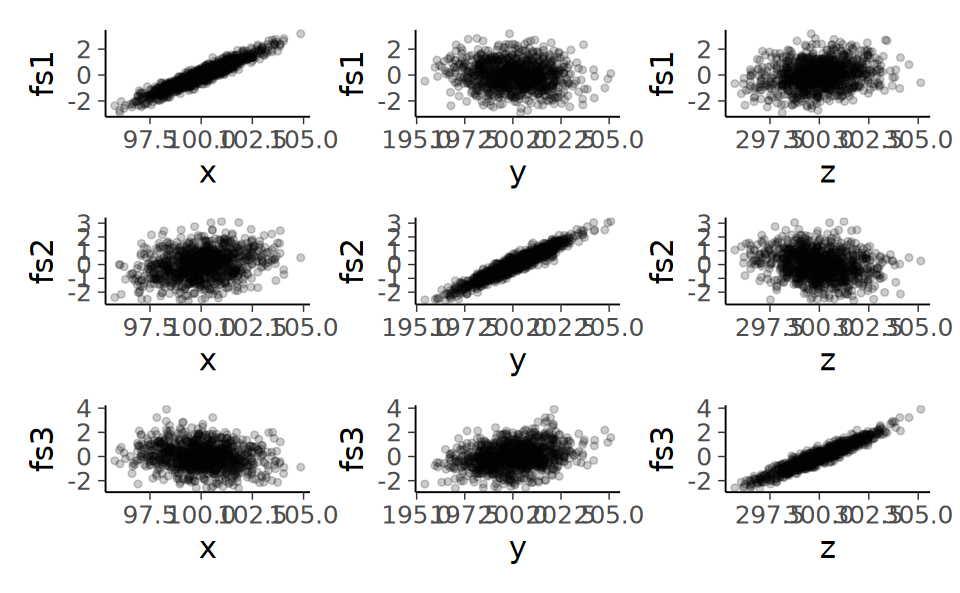

In [13]:
(p1 | p2 | p3) /
(p4 | p5 | p6) /
(p7 | p8 | p9) 

I risultati riportati nella figura confermano le aspettative.

Il metodo della regressione pone il problema della stima dei punteggi
fattoriali nei termini di una ideale regressione di ogni fattore
rispetto a tutte le variabili osservate. Per il fattore $j$-esimo, si
può scrivere la seguente equazione: 

$$
\begin{aligned}
F_j =& \beta_{1j}y_1 + \dots + \beta_{pm}y_p + \varepsilon_j
\end{aligned}
$$ 

dove $F_j$ sono i punteggi fattoriali e $y$ sono le variabili osservate standardizzate $(Y-\bar{Y})/s$. In forma matriciale, il modello diventa

$$
\textbf{F} = \textbf{y} \textbf{B} +
\boldsymbol{\varepsilon}
$$ 

I coefficienti parziali di regressione **B** sono ignoti. Tuttavia, possono essere calcolati utilizzando i metodi della regressione lineare. Nel modello di regressione, infatti, i coefficienti dei minimi quadrati possono essere calcolati utilizzando due matrici di correlazioni: la matrice $\textbf{R}_{xx}$ (le
correlazioni tra le variabili $X$) e la matrice $\textbf{R}_{xy}$ (le
correlazioni tra le variabili $X$ e la variabile $Y$:

$$
\hat{\textbf{B}} = \textbf{R}_{xx}^{-1}\textbf{R}_{xy}
$$ 

Nel caso dell'analisi fattoriale, $\textbf{R}_{xx}$ corrisponde alla
matrice delle correlazioni tra le variabili osservate e
$\textbf{R}_{xy}$ corrisponde alla matrice di struttura (la matrice
delle correlazioni tra le variabili osservate e i fattori). Se i fattori
sono ortogonali, la matrice di struttura coincide con la matrice dei
pesi fattoriali $\hat{\boldsymbol{\Lambda}}$.

I coefficienti **B** dell'equazione precedente possono dunque essere trovati nel modo seguente:

$$
\begin{equation}
\hat{\textbf{B}} = \textbf{R}_{yy}^{-1}\textbf{R}_{xf}=
\textbf{R}^{-1}\hat{\boldsymbol{\Lambda}}
\end{equation}
$$

Una volta stimati i coefficienti $\hat{\textbf{B}}$, i punteggi fattoriali si calcolano allo stesso modo dei punteggi teorici del modello di regressione:

$$
\begin{equation}
\hat{\textbf{F}} = \textbf{y} \hat{\textbf{B}} = \textbf{y}
\textbf{R}^{-1}\hat{\boldsymbol{\Lambda}},
\end{equation}
$$

dove $\textbf{y}$ è la matrice delle variabili osservate standardizzate $(Y-\bar{Y})/s$.

**Esercizio.** Si utilizzino i dati `dass21.txt` che corrispondono alla somministrazione del test DASS-21 a 334 partecipanti. Lo schema di codifica si può trovare seguendo questo [link](https://maic.qld.gov.au/wp-content/uploads/2016/07/DASS-21.pdf). Ci si focalizzi sulla sottoscala Stress del DASS-21. Si trovino i punteggi fattoriali usando la funzione `factanal()` e si replichi il risultato seguendo la procedura delineata sopra.


## Session Info

In [14]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods  
[7] base     

other attached packages:
 [1] kableExtra_1.4.0  corrplot_0.94     nortest_1.0-4    
 [4] MASS_7.3-61       ggokabeito_0.1.0  viridis_0.6.5    
 [7] viridisLite_0.4.2 ggpubr_0.6.0      ggExtra_0.10.1   
[10] gridExtra_2.3     patchwork_1.3.0   bayesplot_1.11.1 
[13] semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-19    
[16] psych_2.4.6.26    scales_1.3.0      markdown_1.13    
[19] knitr_1.48        lubridate_1.9.3   forcats_1.0.0    
[22] stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[25] readr_2.1.